In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

In [2]:
theta_0 = np.pi / 2 
theta_prime_0 = 0
L = 1  # m
g = 9.8  # m/s^2
omega = np.sqrt(g/L)
T = 2 * np.pi / omega

print(f"Period predicted by simple pendulum formula is {T}")

Period predicted by simple pendulum formula is 2.007089923154493


In [3]:
def dy_dt(initial, t, delta):
    y1, y2 = initial    
    return [y2, - omega**2 * np.sin(y1) * (1 - delta * np.abs(np.sin(y1)))]

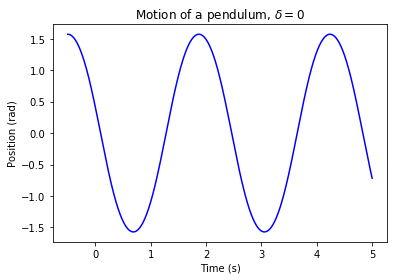

In [4]:
t_start = -0.5
t_end = 5
n = 10000
t = np.linspace(t_start, t_end, n)

y0 = [theta_0, theta_prime_0]
delta = 0

sol = odeint(dy_dt, y0, t, args=(delta,))
plt.plot(t, sol[:, 0], 'b')
plt.title("Motion of a pendulum, $\delta=0$")
plt.xlabel("Time (s)"); plt.ylabel("Position (rad)")
plt.show()

Period is 2.0072s at 0.0001 rad, err: 3e-05
Period is 2.0105s at 0.1633 rad, err: 0.00167
Period is 2.0209s at 0.3264 rad, err: 0.00688


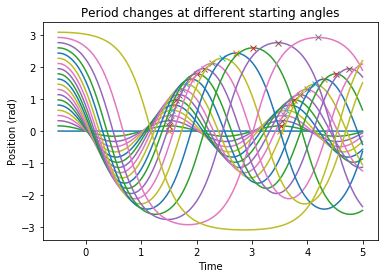

In [5]:
npar = 20
par = np.linspace(1e-4, 3.1, npar)
for i in range(npar):
    y_initial = [par[i], theta_prime_0]
    sol = odeint(dy_dt, y_initial, t, args=(delta,))
    x = sol[:, 0]
   
    # I used scipy's find_peaks method instead of iterating with a for loop
    peaks, _ = find_peaks(x, height=0)
    plt.plot(t, x)
    plt.plot(t[peaks], x[peaks], "x")
    try:
        period = t[peaks][1] - t[peaks][0]  # find the period from the time difference between two peaks
        err = abs(((T - period) / T))
        if err <= 0.01:
            print(f"Period is {round(period, 4)}s at {round(par[i], 4)} rad, err: {round(err, 5)}")
    except IndexError:
        pass  # no peaks
    
plt.title("Period changes at different starting angles")
plt.xlabel("Time"); plt.ylabel("Position (rad)")
plt.show()

In [6]:
deltas = np.linspace(0, 0.999, 100)
periods = []

t_start = -0.5
t_end = 30
n = 10000
t = np.linspace(t_start, t_end, n)
for delt in deltas:
    sol = odeint(dy_dt, y0, t, args=(delt,))
    x = sol[:, 0]    
    if delt == 1:
        periods.append(0)
        continue
    peaks, _ = find_peaks(x, height=0)
    try:
        period = t[peaks][1] - t[peaks][0]
    except IndexError:
        period = t[peaks][0]
    periods.append(period)

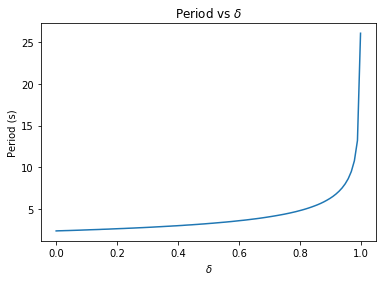

In [7]:
plt.plot(deltas, periods)
plt.title("Period vs $\delta$")
plt.xlabel("$\delta$"); plt.ylabel("Period (s)")
plt.show()

If $\delta$ = 1, the pendulum does not oscillate at all. From both plots, it appears as delta approaches 1, the the period will asymptotically approach infinity, where at 1 the period can be considered "infinity" or zero as the pendulum does not move.  